# Motivation

In late March/early April of 2020 the eyes of global media were fixed on the United States as coronavirus pandemic was spreading faster than anyone would have anticipated. National, as well as local governmant, have been highly criticized for not taking action against the spread of the disease earlier ([Obama says White House response to coronavirus has been 'absolute chaotic disaster'](https://edition.cnn.com/2020/05/09/politics/obama-trump-coronavirus-response-flynn-case/index.html), [US's global reputation hits rock-bottom over Trump's coronavirus response](https://www.theguardian.com/us-news/2020/apr/12/us-global-reputation-rock-bottom-donald-trump-coronavirus)). 

The epicenter of the pandemic in The USA is in New York City. The 15th of March 2020 10 people had already died in NYC, fast forward to the 2nd of April and the death toll had risen 30 fold to 3001. 

In the midst of the early crisis, news headlines and reports stated that people of *African-American* and *Hispanic* ethnicities where being hit harder by the crisis than other races. 

- [New York City's Latinx Residents Hit Hardest By Coronavirus Deaths](https://www.npr.org/2020/04/08/829726964/new-york-citys-latinx-residents-hit-hardest-by-coronavirus-deaths)
- [Virus Is Twice as Deadly for Black and Latino People Than Whites in N.Y.C.](https://www.nytimes.com/2020/04/08/nyregion/coronavirus-race-deaths.html)

While other sources sought to link the spread to each individuals socioeconomic status.

- [Coronavirus Numbers Reflect New York City’s Deep Economic Divide](https://theintercept.com/2020/04/09/nyc-coronavirus-deaths-race-economic-divide/)
- [IN NYC, 'stark contrast' in COVID-19 infection rates based on education and race](https://abcnews.go.com/Health/nyc-stark-contrast-covid-19-infection-rates-based/story?id=69920706)

The widespread sensationalist headlines and lack of clarity might sway the understanding that the public has of the causes behind some ethnicities being hit most. We wanted to further look into this subject and bring to light, in an easily digestible way, some of the factors that are linked with the spread of the virus. Ethnicities are strongly linked with socio-economic status, thus separating the effects is not possible. However, being more aware of this fact and being able to better understand each individual factor's correlation to the spread of the virus will make this subject less sensationalist and more grounded in real facts.
  
***What is your dataset?***

The dataset is gathered from three sources.

1. New York City Poverty Measure from the [Poverty Research Team](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/poverty-measure.page) in New York City. This dataset includes accurate information on the economical status of the residents of New York. We use the latest-available, from 2017 (published in May 2019).
2. Demographic statistics for each ZCTA gotten from [*Missouri Census Data Center*](https://census.missouri.edu/acs/profiles/). It contains cleaned anonymized data from the US Census Bureau. We select the period 2014-2018 to match the NYC Poverty data.
3. The number of tests and Coronavirus cases at the county (borough) level in the entire New York State from [New York State Health Department](https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e) . We are only interested in NYC, but this dataset provides accurate historical data that is already cleaned.
4. COVID-19 cases by ZIP Code Tabulated Area (ZCTA), provided by NYC-Health on [GitHub](https://github.com/nychealth/coronavirus-data/blob/master/tests-by-zcta.csv). The dataset consists numbers for coronavirus per ZCTA containing `#tests`, `#positive tests`. 

The shapefile used comes from the NYC Department of Health's Github repository on COVID-19 [here](https://github.com/nychealth/coronavirus-data).

***Why did you choose this/these particular dataset(s)?***

We are interested in looking into the demographic details of whom got most affected by Coronavirus. Our objective is making the user aware that ethnicities are not the whole story, many other factors are playing into the spread of Coronavirus, and they are all inter-linked together. 

We first need to provide an historical trend of the spread of Coronavirus in NYC and understand if some areas are more afflicted than others in New York City. To get this historical perspective, we use dataset 3).

To then understand the demographics of NYC and display some summary statistics on the composition of each borough and each ethnicity in NYC we use dataset 1), which has really accurate data on poverty and economical status of residents of NYC.

The idea is then finding more about the underlying causes behind the spread of the virus. Why do we have more cases in certain boroughs that are mostly populated by a certain ethnicity? We know that ethnicity does not give the whole picture, is there something more behind it? We want to let the user be aware of these issues, to come out of this exploration knowing more than what he knew before, finding out something concrete. We use the ZCTAs data (2 and 4) to find out more about the correlation between COVID-19 cases and underlying characteristics of the population that have been affected by it. The reason why we decide to use ZCTAs is because this is the highest level of precision we have in the COVID-19 cases reports. We can see this by accessing the NYC Health Department website (https://www1.nyc.gov/site/doh/covid/covid-19-data.page) where we have access to all the main publicly-available datasets. Having the highest precision is highly necessary because we are trying to find correlations between characteristics of the population and the probability of them getting infected by Coronavirus. For such a task, case-by-case data would be best, but instead we use ZCTA-level summary statistics to approximate the information.


***What was your goal for the end user's experience?***

The goal is for the user to better understand the causes behind the spread of Coronavirus. The news might sometime sway the public, using sensationalist headlines, that cause fear and misunderstanding in those that read them. However, the real causes of the spread are much more complicated, and we want the user to understand this. We want to effectively show how some of the more interesting factors are related to Coronavirus and that the actual answer to "are some ethnicities more likely to get Coronavirus than others?" is much more complicated than a simple correlation plot.

We create interactive graphs and maps for the end user to use as a tool to understand the characteristics of:
1. neighbourhoods that have been hit the hardest by the pandemic
2. neigbhourhoods that have escaped the worst of the crisis

Even though the end user will be guided through the statistics that we found most relevant through the exploratory analysis, we would like our visualizations to leave room for interpritability and have the reader come up with his/hers own conclusion based on the data we showed.

1. Motivation
    * Dataset description
    * Detaset motivation
    * Goal of the visualization
2. Introducing the data sets
    * Import the datasets and clean them
    * Merge the data
    * Discussion on variable selection
3. Exploratory Data Analysis
    * COVID-19 time evolution
    * Demographics summary
    * Discussion on the Education Index
4. Data Analysis
    * Correlation to the number of positive cases
    * Correlation between variables
    * The Statistical Learning Model
5. Genre
    * Data Story
    * Tools of Visual Narrative 
    * Tools of Narrative Structure
6. Visualizations
    * Explaination of the visualizations.
    * Why are they relevant
7. Discussion
    * The good
    * The bad
    * What to improve
8. Contributions

# Basic stats

In [7]:
# Utilities
import numpy as np
import pandas as pd
import datetime

# modelling
from sklearn import preprocessing
import sklearn.neural_network as nn
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, scale, PolynomialFeatures
from sklearn.model_selection import KFold, LeaveOneOut,cross_val_score, train_test_split
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as SM

# Plot tools
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, CustomJS, Slider, LinearAxis, Div,Plot,Text,Select,Span
from bokeh.models.widgets import Select
from bokeh.palettes import Category20, Spectral4,Spectral7,Category10
from bokeh.transform import dodge
from bokeh.palettes import Spectral4,Spectral7
from bokeh.layouts import widgetbox,row,column
from bokeh.events import ButtonClick
from bokeh.models import Button, Div
sns.set_context("paper")
sns.set_style("white")
output_notebook()

### Introducing the data sets
This is the content of the following section:

1. Import all the datasets into the notebook, cleaning each one as we go in the order:
    1. NYC Poverty;
    2. ZCTA demographics;
    3. Historical COVID-19 data;
    4. ZCTA-level COVID cases;
2. Merging the data.
3. Justification for the selection of the variables.

#### 1. Import all datasets
#### Data set 1: NYC poverty measure

Here we look at the income, ethnicity, age, poverty measures and other parameters of individuals in NYC.

We select the important statistics by finding those that relate to income, ethnicity, age and poverty, which is what we want to highlight and show the user. The description of all the categories can be found through https://www1.nyc.gov/site/opportunity/poverty-in-nyc/poverty-measure.page. In particular, the weight (`PWGTP`) is used to correctly compute summary statistics, as it is a weight that needs to be attributed to each person.

In [8]:
df_poverty= pd.read_csv("data/NYCgov_Poverty_Measure_Data__2017_.csv")

# we select only interesting statistics
focus_columns_nyc_data=(["SERIALNO", "AGEP","SEX", "NYCgov_MOOP","Boro","HIUnit_ID", "Ethnicity","PWGTP",
                        "NYCgov_Income","NYCgov_Threshold","NYCgov_Pov_Stat", "NYCgov_EITC",
                        "NYCgov_PovGap","NYCgov_PovGapIndex"])
df_poverty=df_poverty[focus_columns_nyc_data]

# used to convert from the numbers in the dataset to human-readable
ethnicities = {
    1: "White",
    2: "Black" ,
    3: "Asian" ,
    4: "Hispanic",
    5: "Other Ethnic Group"
}
# add ethnicity names to data
df_poverty=df_poverty.assign(ethnicity_name=df_poverty["Ethnicity"])
for key, value in ethnicities.items():
    df_poverty.loc[(df_poverty["ethnicity_name"] == key), "ethnicity_name"]=value

#add borough names to make them human-readable
boroughs = {
    1: "Bronx",
    2: "Brooklyn",
    3: "Manhattan",
    4: "Queens",
    5: "Staten Island"
}
# add it to the data
for key, value in boroughs.items():
    df_poverty.loc[(df_poverty["Boro"] == key), "Boro"]=value

#make columns lower
df_poverty.columns=[i.lower() for i in df_poverty.columns]

#only k
df_poverty.columns=['serialno', 'age', 'sex', 'medical_spending', 'boro', 'hiunit_id',
       'ethnicity', 'weight', 'income', 'nycgov_threshold',
       'nycgov_pov_stat', 'nycgov_eitc', 'nycgov_povgap', 'nycgov_povgapindex',
       'ethnicity_name']
df_poverty=df_poverty.drop(["hiunit_id","nycgov_threshold","serialno","nycgov_povgap","nycgov_povgapindex","nycgov_eitc"],1)

df_poverty.loc[df_poverty["nycgov_pov_stat"]==1,"nycgov_pov_stat"]="in poverty"
df_poverty.loc[df_poverty["nycgov_pov_stat"]==2,"nycgov_pov_stat"]="not in poverty"

In [9]:
df_poverty.head(5)

,age,sex,medical_spending,boro,ethnicity,weight,income,nycgov_pov_stat,ethnicity_name
0,31,1,4673.138,Brooklyn,1,56,80489.748482,not in poverty,White
1,28,2,1774.481,Brooklyn,1,58,29917.996764,not in poverty,White
2,54,1,5500.131,Manhattan,1,111,61992.182430,not in poverty,White
3,45,2,5500.131,Manhattan,2,86,61992.182430,not in poverty,Black
4,75,2,4215.699,Brooklyn,3,62,23909.592730,not in poverty,Asian


#### Data set 2: ZCTA-level demographics data

We have data for each ZCTA, used to merge with the ZCTA COVID-19 data. Source: https://census.missouri.edu/acs/profiles/.

We decide to select only the most interesting statistics. This initial selection is based on considerations made 

In [113]:
datasets_n = 3
data_path = r"data_zcta/"
name_list = ["demographic", "economic", "social"] #"housing", didn't find much interesting stuff in that one
dataset_list=[]
df_temp_cat=[]
for name in name_list:
    for i in range(datasets_n):
        df_temp = pd.read_csv(data_path+name+str(i+1)+'.csv')
        df_temp=df_temp.loc[:, ~df_temp.columns.str.contains('^Unnamed')] #remove MOE and percent (specified as unnamed in DF)
        df_temp=df_temp.T
        df_temp.columns=[str(i).rstrip(" ").lstrip(" ").lower() for i in df_temp.iloc[0]]
        df_temp=df_temp.drop(df_temp.index[0]) 
        if(name == "demographic"):
            df2=df_temp[["total population", "male","female",'median age in years'
                        ]]
            df1=df_temp.iloc[:,[55,57, 58, 60]]
            df_temp=pd.concat([df2,df1],axis=1)
        elif(name == "economic"):
            df1=df_temp[['per-capita income','public transportation (excluding taxicab)']]
            #df2=df_temp.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]]
            #df_temp=pd.concat([df2,df1],axis=1)
            df_temp=df1
        elif(name == "social"):
            df_temp=df_temp[['less than 9th grade',
                         'high school graduate (includes equivalency)',
                         'bachelors degree',
                         'graduate or professional degree','average household size']]
        df_temp = df_temp.T
        df_temp_cat.append(df_temp)
        
    df_temp_cat = pd.concat(df_temp_cat, axis=1)
    dataset_list.append(df_temp_cat)
    df_temp_cat=[]
    
df=pd.concat(dataset_list)
df.columns=[i.lstrip("ZCTA5 ") for i in df.columns]
#transpose the data
df=df.T
#remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]
df.index.name = "zcta"
df.reset_index(level=0, inplace=True)
df=df.replace("-", 0)
df.head(5)

,zcta,total population,male,female,median age in years,hispanic or latino of any race,white alone,black or african american alone,asian alone,per-capita income,public transportation (excluding taxicab),less than 9th grade,high school graduate (includes equivalency),bachelors degree,graduate or professional degree,average household size
0,10006,3454,1633,1821,31.8,414,2183,36,687,114611,1455,16,27,1368,1142,1.93
1,10007,7023,4118,2905,36,580,5056,294,826,147547,2112,162,376,2269,1989,2.25
2,10005,8831,4003,4828,30.1,608,6132,219,1497,106702,4209,48,296,3191,2634,2.02
3,10280,9384,4477,4907,38.1,826,6612,164,1474,110785,2905,0,87,3151,3179,2.06
4,10065,28109,12248,15861,39.8,1849,22684,575,2633,129810,7035,128,1404,8643,9766,1.87


#### Data set 3: COVID 19 NY State testing

This data comes from the official NYS health site, https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e. It is used to show number of positives each day and will be used for a temporal visualization of the COVID-19.

In [71]:
df_newyork = pd.read_csv("data/New_York_State_Statewide_COVID-19_Testing.csv")
df_newyork["Test Date"] = pd.to_datetime(df_newyork["Test Date"], format = "%m/%d/%Y")

county_to_borough = {
    "New York": "Manhattan",
    "Bronx": "Bronx",
    "Richmond": "Staten Island",
    "Queens": "Queens",
    "Kings": "Brooklyn"
}
df_nyc_covid = df_newyork[df_newyork["County"].isin(county_to_borough.keys())].copy()

for key, value in county_to_borough.items():
    df_nyc_covid.loc[:,"County"]= df_nyc_covid.loc[:,"County"].replace(key, value)

df_nyc_covid.rename(columns={"Total Number of Tests Performed": "Number of New Tests Performed"}, inplace = True)
df_nyc_covid.head(5)

,Test Date,County,New Positives,Cumulative Number of Positives,Number of New Tests Performed,Cumulative Number of Tests Performed
2,2020-05-13,Bronx,303,41980,3338,127471
23,2020-05-13,Brooklyn,428,51095,6107,168270
30,2020-05-13,Manhattan,177,24525,3697,100869
40,2020-05-13,Queens,336,58084,4439,171836
42,2020-05-13,Staten Island,51,12861,869,43540


#### Data set 4: COVID-19 ZCTAs data

This is ZCTA-level data and is used to have better prediction of the actual correlation between poverty, demographics and covid infection. https://github.com/nychealth/coronavirus-data/blob/master/tests-by-zcta.csv

In [72]:
df_tests_zcta = pd.read_csv("data/tests-by-zcta.csv")
df_tests_zcta=df_tests_zcta.sort_values("zcta_cum.perc_pos")

# we drop entries with NaN values, the NA values have no ZCTA code and convert to object
df_tests_zcta=df_tests_zcta.dropna()
df_tests_zcta["MODZCTA"]=df_tests_zcta["MODZCTA"].astype("int").astype("str")
df_tests_zcta.columns=[i.lower() for i in list(df_tests_zcta.columns)]
df_tests_zcta.rename(columns={"total":"total tests"}, inplace=True)

df_tests_zcta.head(5)

,modzcta,positive,total tests,zcta_cum.perc_pos
6,10006,11,44,25.00
7,10007,34,109,31.19
5,10005,39,117,33.33
43,10280,28,83,33.73
39,10065,218,639,34.12


First let's look at the size of the data sets.

In [73]:
mb=round(df_poverty.memory_usage(index=True, deep=True).sum()*10**(-6),2)
print("NYC Poverty data:")
print("Shape of data set (rows x columns): {}, dataframe megabyte usage: {}."
      .format(df_poverty.shape,mb))

print()

mb=round(df.memory_usage(index=True, deep=True).sum()*10**(-6),2)
print("US Census ZCTA-level demographics:")
print("Shape of data set (rows x columns): {}, dataframe megabyte usage: {}."
      .format(df.shape,mb))

print()

mb=round(df_nyc_covid.memory_usage(index=True, deep=True).sum()*10**(-6),2)
print("COVID 19 NY State cases:")
print("Shape of data set (rows x columns): {}, dataframe megabyte usage: {}."
      .format(df_nyc_covid.shape,mb))

print()

mb=round(df_tests_zcta.memory_usage(index=True, deep=True).sum()*10**(-6),2)
print("COVID-19 ZCTAs data:")
print("Shape of data set (rows x columns): {}, dataframe megabyte usage: {}."
      .format(df_tests_zcta.shape,mb))

NYC Poverty data:
Shape of data set (rows x columns): (68094, 9), dataframe megabyte usage: 24.85.

US Census ZCTA-level demographics:
Shape of data set (rows x columns): (177, 16), dataframe megabyte usage: 0.17.

COVID 19 NY State cases:
Shape of data set (rows x columns): (365, 6), dataframe megabyte usage: 0.05.

COVID-19 ZCTAs data:
Shape of data set (rows x columns): (177, 4), dataframe megabyte usage: 0.02.


#### 2. Merging datasets

Here we merge some datasets to get all the statistics together. Mostly book-keeping, we also introduce the *Education Index*, explained later. We also normalize the data of the ZCTAs by the population to get better statistics later on.

In [74]:
df_zcta = pd.merge(left=df, right=df_tests_zcta, how='left', left_on="zcta", right_on = "modzcta").drop("modzcta", axis=1)

#make numeric
df_zcta[df_zcta.columns[1:]]=df_zcta[df_zcta.columns[1:]].apply(pd.to_numeric, errors='coerce')

#other races
other_races = df_zcta['total population']-(df_zcta['hispanic or latino of any race']+ df_zcta['white alone']+df_zcta['black or african american alone']+ df_zcta['asian alone'])
df_zcta=df_zcta.assign(some_other_race=other_races)

cols=['less than 9th grade',
       'high school graduate (includes equivalency)', 'bachelors degree',
       'graduate or professional degree']

#add weighted mean for the education
Weights=[0,1,2,3]
def weighted(df, W,cols, w="Education Index", T='total population'):
                df[w]=(df[cols[0]]/df[T])*W[0]+ (df[cols[1]]/df[T])*W[1]+(df[cols[2]]/df[T])*W[2]+ (df[cols[3]]/df[T])*W[3]
                df[w]=(df[w]-df[w].min())/(df[w].max()-df[w].min())
                return df

df_zcta=weighted(df_zcta, Weights,cols)
df_zcta['Education Index']

# drop old data
df_zcta=df_zcta.drop(['less than 9th grade',
                      'high school graduate (includes equivalency)',
                      'bachelors degree',
                      'graduate or professional degree',"zcta_cum.perc_pos"],1)

# normalize by total pop
df_zcta[['male','female','hispanic or latino of any race', 'white alone',
         'black or african american alone', 'asian alone','public transportation (excluding taxicab)',"positive","total tests",'some_other_race']]=df_zcta[['male','female','hispanic or latino of any race', 'white alone',
         'black or african american alone', 'asian alone','public transportation (excluding taxicab)',"positive","total tests",'some_other_race']].div(df_zcta["total population"],0)

#### 3. Discussion on selected variables

The data we had available, in particulat the NYC Poverty data and the Census ZCTA-level data had a lot of variables that we could pick from. We decided to select those that we thought were most interesting for the end-user and most useful for our analysis. 

The first criteria was the focus of our analysis. We are looking at COVID-19 cases, so things like age, income, access to healthcare, transportation, education, household size, they are all interesting factors that we want to analyze, as they are most correlated with how the virus spreads in a community. Then we want to look into ethnicities, so these are also interesting to us.

In our selection we have to be aware that lots of variables will be highly correlated and will tell the same story. One very simple example is percentage of females and males, selecting only one is enough to fully understand the distribution of the population and the correlation between gender and COVID-19 cases. Another example that we struggled with in particular is the `workes from home` and `public transport` variables. The first indicates the number of people working from home, while the second is the number of people using public transport to get to work. They are exclusive in nature. If one works from home, she cannot also use the bus to go to work. We decided to select `public transport` as it had more people using it, thuse being more reliable against outliers. 

In [75]:
df_zcta.to_csv("df_zcta.csv")
df_poverty.to_csv("df_poverty.csv")
df_nyc_covid.to_csv("df_nyc_covid.csv")

## Exploratory Data Analysis

We now perform the initial data exploration to understand better our dataset. The following are a selection of interesting graphs, not all the exploration that we did to find the information we wanted.

### COVID-19 Time Evolution

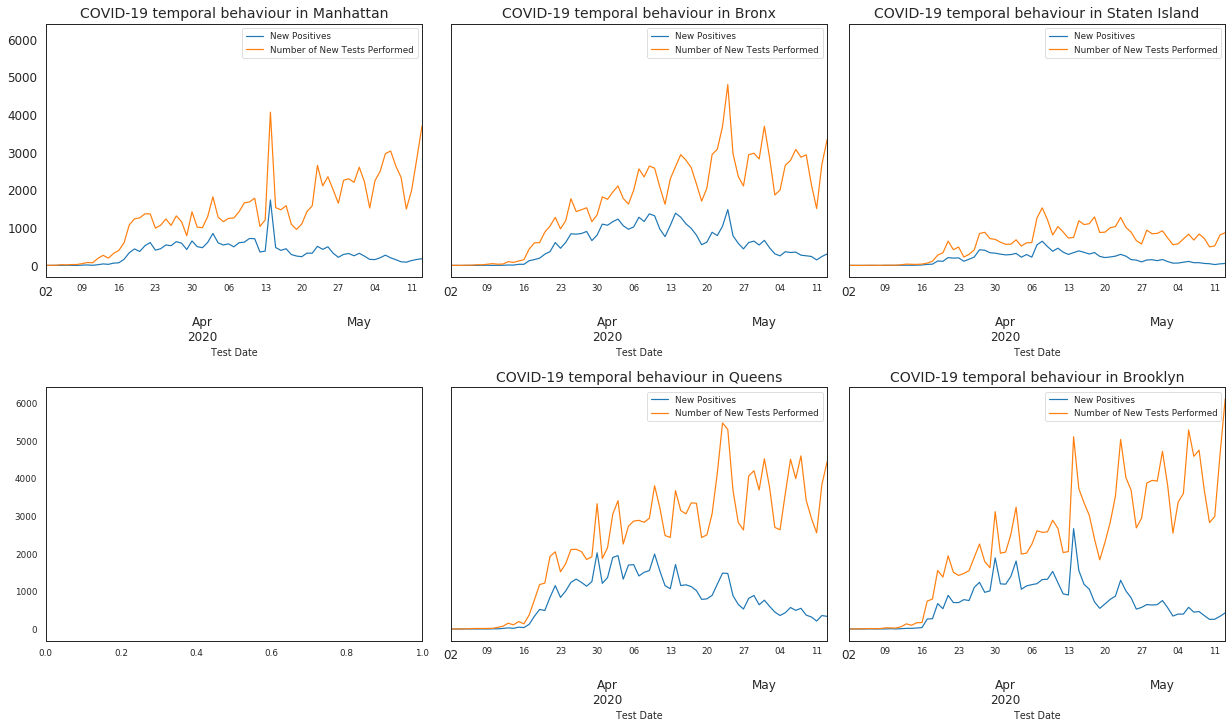

In [124]:
cols = 3
rows = 2
ig, axes = plt.subplots(ncols = cols, nrows = rows, figsize = (17,10), constrained_layout = True, sharey = True)
h = 0
j = 0
for i,county in enumerate(list(county_to_borough.values())):
    axes[h,j].tick_params(labelsize=12)
    axes[h,j].set_title("COVID-19 temporal behaviour in {}".format(county),fontsize=14)
    df_nyc_covid[df_nyc_covid["County"] == county].plot(x = "Test Date", y = ["New Positives", "Number of New Tests Performed"], ax = axes[h,j])
    
    if j == cols-1:
        j = 0
        h +=1
    j+=1


With this first preliminary plot we see the historical trend of the number of tests performed. We see a clear increase in the number of tests, that spike periodically. We investigate this.

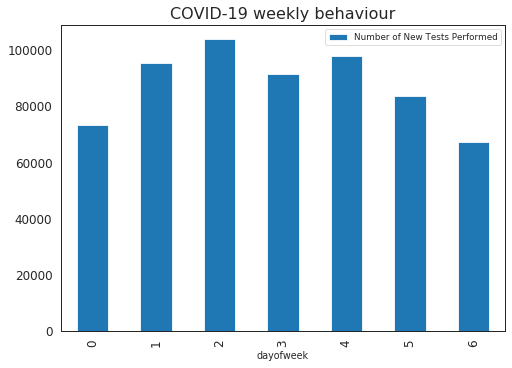

In [125]:
cols = 3
rows = 2
fig, axes = plt.subplots( figsize = (7,5), constrained_layout = True, sharey = True)

axes.set_title("COVID-19 weekly behaviour",fontsize=16)
df_nyc_covid["dayofweek"] = df_nyc_covid["Test Date"].dt.dayofweek
df_nyc_covid.groupby("dayofweek").sum().plot(kind = "bar",y = ["Number of New Tests Performed"], ax = axes)
axes.tick_params(labelsize=12)
plt.show()

The number of new tests performed clearly spike in the middle of the week, with a small decrease Thursday, to then reach the lowest on Sunday and then pick up again. This behaviour would not appear if it was averaged out.

We now plot all the boroughs against each other to better understand their relative behaviour. We look into the number of new cases.

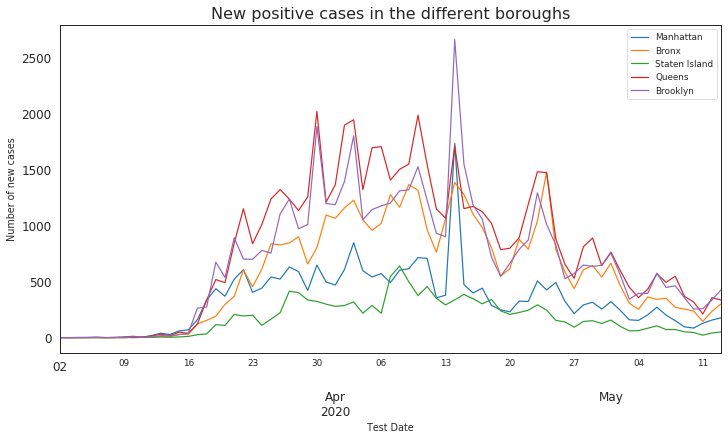

In [127]:
fig, axes = plt.subplots(figsize = (10,6), constrained_layout = True, sharey = True)
axes.set_title("New positive cases in the different boroughs",fontsize=16)

legend_handles = []
for i,county in enumerate(county_to_borough.values()):
    df_nyc_covid[df_nyc_covid["County"] == county].plot(x = "Test Date", y = ["New Positives"], ax = axes, label = [county])
#plt.legend(*legend_handles, ["New positive cases in {}".format(county_to_borough[county]) for county in county_to_borough.keys()])

axes.tick_params(labelsize=12)
axes.set_ylabel("Number of new cases")
plt.show()

From this plot we can see tht the first peak was reached at the beginning of April by all boroughs. The big spike the 14th of April is probably linked to the revision in how deaths are counted. [N.Y.C. Death Toll Soars Past 10,000 in Revised Virus Count](https://www.nytimes.com/2020/04/14/nyregion/new-york-coronavirus-deaths.html).

### Demographics summary

Follow some plots that summarize the basic statistics for New York City, using the poverty data.  In order to define the charecteristics of each borough of New York City we create two boxplots:
1. For the distribution of *total income* for each borough
2. For the distribution of *Medical Spending* for each of them

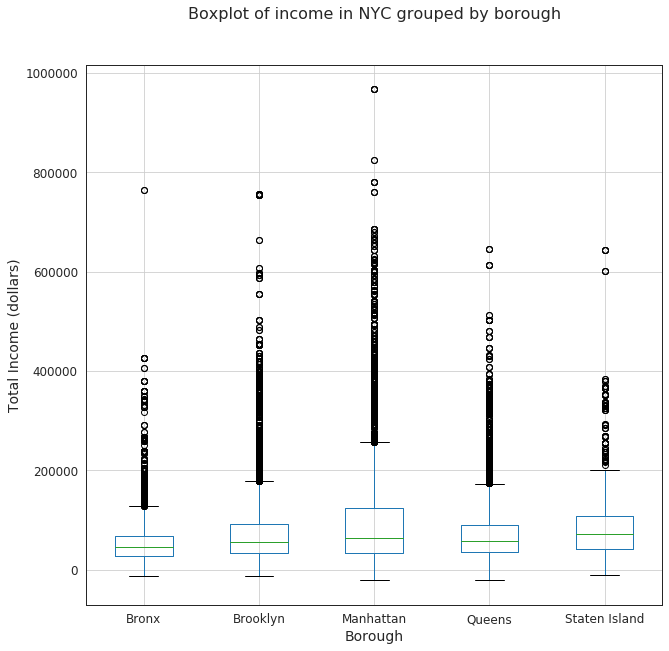

In [128]:
fig, ax = plt.subplots(figsize = (10,10))
df_poverty.boxplot(by = "boro",column = "income", ax = ax, showfliers=True)
ax.set_xticklabels(list(boroughs.values()))
ax.set_xlabel("Borough",fontsize=14)
ax.set_ylabel("Total Income (dollars)",fontsize=14)
ax.set_title("")
fig.suptitle('Boxplot of income in NYC grouped by borough', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

From this we can see that the median income is the highest in Staten Island and Manhattan. Follow Qeens and Brooklyn and Bronx, which has the lowest income over all. We need to remember that Staten Island has also the smallest population so some statistics might be skewed by outliers. We also highlight that a lot of outliers are present, which are then removed when we do the final visualization for the end-user, to allow easier reading of the already non-conventional box-plot.


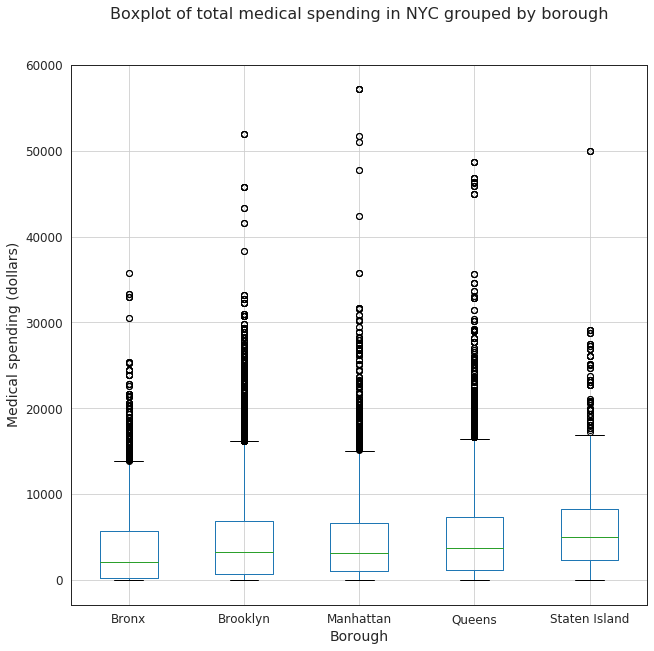

In [129]:
fig, ax = plt.subplots(figsize = (10,10))
df_poverty.boxplot(by = "boro",column = "medical_spending", ax = ax, showfliers=True)
ax.set_xticklabels(list(boroughs.values()))
ax.set_xlabel("Borough",fontsize=14)
ax.set_ylabel("Medical spending (dollars)",fontsize=14)
ax.set_title("")
fig.suptitle('Boxplot of total medical spending in NYC grouped by borough', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()



Total medical spending is the highest in Staten Island and Queens thereafter. Weather that implies health awareness or a higher supply of medical resources and infrastructure needed to battle the virus, how logical it may be, will not be answered directly. But we will see if medical spending relates to less cases of coronavirus per-capita. 

Next let us look at the distribution of ethnicities within each borough.
We create a stacked bar-plot to see the distribution of the ethnicities in the population. 

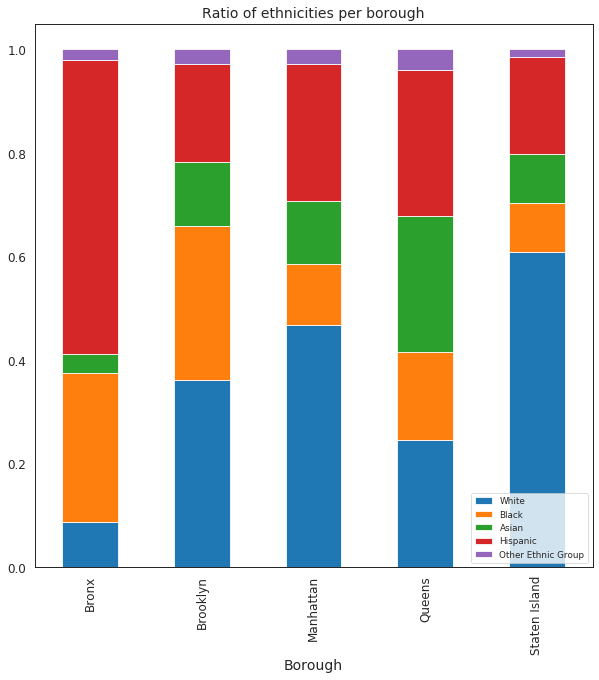

In [130]:
sums_boro = df_poverty.groupby("boro")["weight"].sum()
#sums_boro.head()
ratio_boro_ethn = {}
for ethn, ethn_name in ethnicities.items():
    #print("ethnicity: {}".format(ethn_name))
    ratio_boro_ethn[ethn_name] = df_poverty[df_poverty["ethnicity"] == ethn].groupby("boro")["weight"].sum()/sums_boro

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Ratio of ethnicities per borough",fontsize=14)
pd.DataFrame(ratio_boro_ethn).plot.bar(stacked = True,ax = ax)
ax.set_xlabel("Borough",fontsize=14)
ax.set_xticklabels(list(boroughs.values()))
ax.tick_params(labelsize=12)
plt.show()
    

We can see that the Bronx is mostly populated by Hispanic and African Americans. This borough will be subject of a lot of our observations, as it is the one that presents the most skewed population ethnicity. The other interesting statistic is the almost-even spread in Brooklyn and Queens. With instead Manhattan and Staten Island having mostly White people. All of these are the result of the complex history of New York City, with the inner city and the following expansion to the periphery.

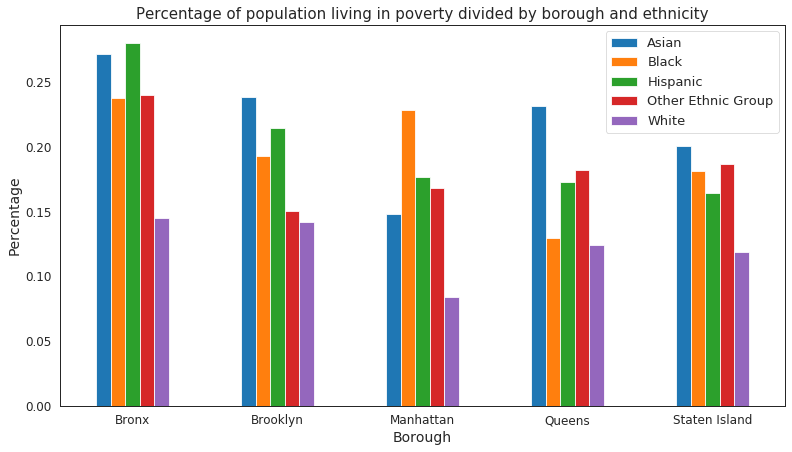

In [102]:
df_poverty.loc[df_poverty["nycgov_pov_stat"]==1,"nycgov_pov_stat"]="in poverty"
df_poverty.loc[df_poverty["nycgov_pov_stat"]==2,"nycgov_pov_stat"]="not in poverty"
fig, ax = plt.subplots(figsize = (13,7))
poverty_percentage=df_poverty[df_poverty["nycgov_pov_stat"]=="in poverty"].groupby(["boro","ethnicity_name"]).count()["sex"].div(df_poverty.groupby(["boro","ethnicity_name"]).count()["sex"].values, axis=0)
poverty_percentage.unstack("ethnicity_name").plot(kind='bar', stacked=False, ax=ax, rot=0).legend(loc='upper right',fontsize=13)
ax.set_title("Percentage of population living in poverty divided by borough and ethnicity", fontsize = 15)
ax.set_xlabel("Borough",fontsize=14)
ax.set_ylabel("Percentage",fontsize=14)
ax.tick_params(labelsize=12)

This is a very informative plot. It clearly shows that, even tough we may attribute poverty to a specific ethnic group when grouping everything together, when instead we split by region, we see a slightly different story. See, in particular, Black and White people in Queens. However, outside of this the trend is still that white people are less poor that any other ethnicity. 

Follows a brief summary table of the most important average statistics for the entirity of NYC, shown for reference.

In [116]:
df_zcta.drop(columns = ["zcta","total population",'hispanic or latino of any race', 'white alone',
       'black or african american alone', 'asian alone', 'some_other_race']).describe(include='all')

,male,female,median age in years,per-capita income,public transportation (excluding taxicab),average household size,positive,total tests,Education Index
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.478365,0.521635,37.617514,44286.661017,0.258377,2.636667,0.012404,0.022222,0.380409
std,0.025882,0.025882,4.638804,31919.087763,0.089091,0.511039,0.004791,0.007536,0.250860
min,0.408185,0.406902,27.800000,13394.000000,0.051412,1.570000,0.002984,0.008845,0.000000
25%,0.462930,0.506104,34.200000,25484.000000,0.196609,2.250000,0.008439,0.016761,0.211127
50%,0.478102,0.521898,37.100000,31779.000000,0.250276,2.670000,0.012077,0.020462,0.303624
75%,0.493896,0.537070,40.600000,46327.000000,0.318824,2.960000,0.016188,0.027566,0.483320
max,0.593098,0.591815,49.400000,147547.000000,0.581174,3.970000,0.026467,0.043978,1.000000


From this ummary table we see that in the entirity of NYC, 25.8% of the people use public transportation to get to work and that the standard deviation of the income is very high (a lot of poor people with some rich ones).

### Explaining the Education Index

When faced with the task of analyzing the data, we had the variables of `less than 9th grade`, `high school graduate (includes equivalency)`, `bachelors degree`, `graduate or professional degree`, which indicated how many people in a borough had a certain level of education. However, we are interested in a direct correlation between education level and COVID-19 cases, without having to see the correlation for each variable. We then decided to introduce an Education Index. The reasoning behind this is that these 4 variables are highly correlated. If a person has a bachelor degree, then they are not at the high school level, they are exclusive, it is the highest level of education attained. Therefore, we decide to use an arbitrary linear combination of these numbers, weighted by the number of people in the ZTCA having attained that level and then normalized by the total number of people living in th ZCTA. In particular:

$$
\mathbf{\omega} = [0,1,2,3]\\
EI_{raw}(A) = \cfrac{1}{T_A} \left(\omega_1 \cdot l_1 + \omega_2 \cdot l_2 + \omega_3 \cdot l_3 +\omega_4 \cdot l_4 \right)\\
$$

where $\omega$ defines the aritrary linear combination, with lower levels of education having a smaller number, while higher levels of education being attributed to bigger numbers. Instead, $l_1, l_2, l_3, l_4$ are the number of people having reached `less than 9th grade`, `high school graduate (includes equivalency)`, `bachelors degree`, `graduate or professional degree` respectively. The $T_A$ is the total number of people living in area $A$. The reason why it's called $EI_{raw}$ is because the final $EI$ is then normalized between $0$ and $1$ after all the raw ones are calculated.

$$
EI = \cfrac{EI_{raw}- \min EI_{raw}}{\max EI_{raw} - \min EI_{raw}}
$$

We decided to do it this way because our interested is looking at correlation, therefore we are only interested in knowing if a certain area has more people that are at a certain education level compared to another one. We don't want to say that the Index has a meaning on its own. It is only useful when multiple areas are compared.

An area with a higher average level of attainement will have a higher index, scaling linearly with the number of people having reached that level, which is want we want to compare things together.

We look into the Education Index compared to the ethnicity, to better understand how it behaves.

We order each area by the percentage of people that have a cetain ethnicity and live there. We then plot this percentage and the Education Index. 

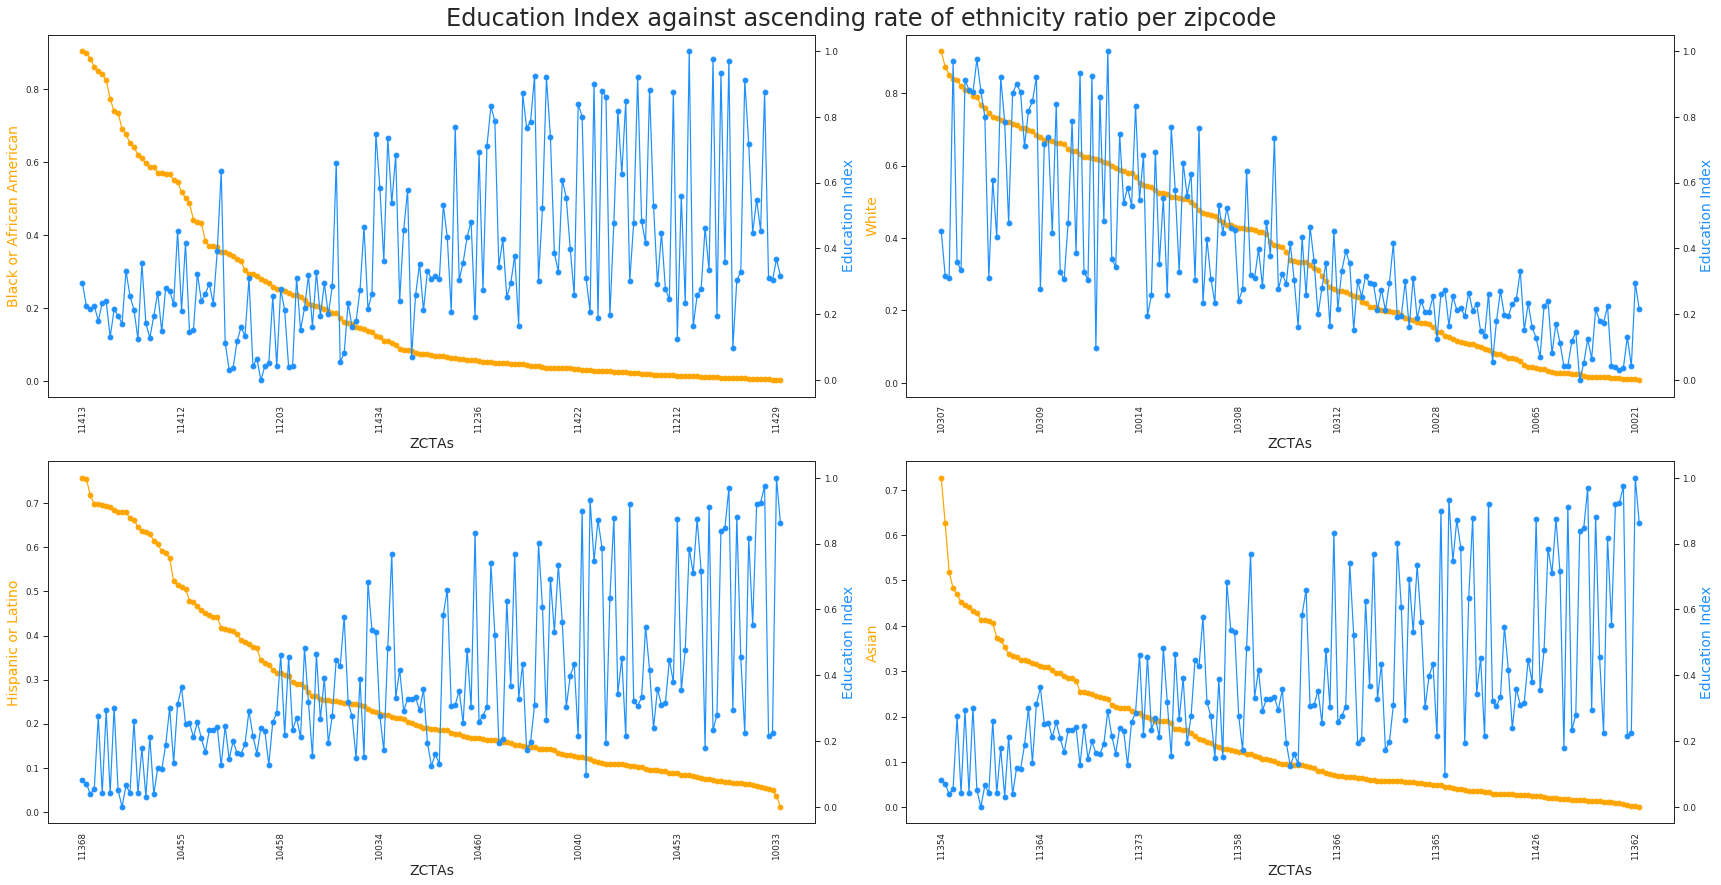

In [139]:
fig=plt.figure(figsize=(24,12))
df_black=df_zcta.sort_values('black or african american alone', ascending=False).reset_index(drop=True)
ax1=fig.add_subplot(221)

# make a plot
ax1.plot(df_black.index, df_black['black or african american alone'], color="orange", marker="o")
# set x-axis label
ax1.set_xlabel("ZCTAs",fontsize=14)
# set y-axis label
ax1.set_ylabel("Black or African American", color="orange",fontsize=14)

zip_labels = df_black.zcta.values
ax1.x_ticks = np.arange(0, 177, 1)
ax1.xaxis.set_ticklabels(zip_labels, rotation=90)
# twin object for two different y-axis on the sample plot
ax1b=ax1.twinx()
# make a plot with different y-axis using second axis object
ax1b.plot(df_black.index, df_black["Education Index"],color="dodgerblue",marker="o")
ax1b.set_ylabel("Education Index",color="dodgerblue",fontsize=14)

ax2=fig.add_subplot(222)
df_white=df_zcta.sort_values('white alone', ascending=False).reset_index(drop=True)
ax2.plot(df_white.index, df_white['white alone'], color="orange", marker="o")
zip_labels = df_white.zcta.values
ax2.xaxis.set_ticklabels(zip_labels, rotation=90)
# set x-axis label
ax2.set_xlabel("ZCTAs",fontsize=14)
# set y-axis label
ax2.set_ylabel("White",color="orange",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2b=ax2.twinx()
# make a plot with different y-axis using second axis object
ax2b.plot(df_white.index, df_white["Education Index"],color="dodgerblue",marker="o")
ax2b.set_ylabel("Education Index",color="dodgerblue",fontsize=14)

# make a plot
ax3=fig.add_subplot(223)
df_hisp=df_zcta.sort_values('hispanic or latino of any race', ascending=False).reset_index(drop=True)
ax3.plot(df_hisp.index, df_hisp['hispanic or latino of any race'], color="orange", marker="o")
zip_labels = df_hisp.zcta.values
ax3.xaxis.set_ticklabels(zip_labels, rotation=90)
# set x-axis label
ax3.set_xlabel("ZCTAs",fontsize=14)
# set y-axis label
ax3.set_ylabel("Hispanic or Latino",color="orange",fontsize=14)
# twin object for two different y-axis on the sample plot
ax3b=ax3.twinx()
# make a plot with different y-axis using second axis object
ax3b.plot(df_hisp.index, df_hisp["Education Index"],color="dodgerblue",marker="o")
ax3b.set_ylabel("Education Index",color="dodgerblue",fontsize=14)

# make a plot
ax4=fig.add_subplot(224)
df_asian=df_zcta.sort_values('asian alone', ascending=False).reset_index(drop=True)
ax4.plot(df_asian.index, df_asian['asian alone'], color="orange", marker="o")
zip_labels = df_asian.zcta.values
ax4.xaxis.set_ticklabels(zip_labels, rotation=90)
# set x-axis label
ax4.set_xlabel("ZCTAs",fontsize=14)
#ax4.xticks(df_asian['zcta'])
# set y-axis label
ax4.set_ylabel("Asian",color="orange",fontsize=14)
# twin object for two different y-axis on the sample plot
ax4b=ax4.twinx()
# make a plot with different y-axis using second axis object
ax4b.plot(df_asian.index, df_hisp["Education Index"],color="dodgerblue",marker="o")
ax4b.set_ylabel("Education Index",color="dodgerblue",fontsize=14)


fig.tight_layout()
fig.suptitle("Education Index against ascending rate of ethnicity ratio per zipcode", y=1.02, fontsize=24)
plt.show()

From these plots we can see clearly that there is a positive correlation between White ethnicity and high Education Index, while the correlation is negative for all other ethnicities. This is a result the indicates that areas with a higher percentage of white people will show a higher Education Index. Something more careful needs to be said about the other ethnicities. It is true that the trend is inverted compared to white people, but it is also true that the Education index spikes a lot, indicating that the inverse correlation is not strong. 

These results confirm our intuition that there is a skew in the education of different ethnicities. It also highlights that the factors that we look at are highly correlated with the ethnicity.

# Data Analysis
This is the analysis we performed on the data, to extrapolate the information we want to ultimately show the user. We used a combination of correlation plots and a machine learning model to explore this fully. The machine learning model is a more statistically sound way of understanding what is happening, but our main goal is letting the users know that things are more complicated than they look, and show them why it is so and how we can better understand what is going on. However, correlation does not mean causation. This is always to be kept in mind. We are not looking at definitevily finding the causes of the spread of Coronavirus, as that would prove almost impossible.


## Correlation analysis

Follows the structure of this subsection.

1. Correlation to the number of positive cases
    * Income, gender, education, age
    * Ethnicities
    * Public transport, household size
3. Correlation between variables


### 1. Correlation to the number of positive cases
To analyze the relationship between each demographic variable of the zipcodes and in particular their correlation with number of coronavirus cases, a correlation heatmap has been created here below. We pick one of two genders and leave out the *total tests* as they are inevitably correlated with the number of positive cases. One could argue that more tests would result in more cases, but the opposite is also true. In our case, for the purposes of our analysis, we keep only the most essential variables and Ratio of positives to Coronavirus completely removes the need to have number of tests because of the very strong correlation. We don't yet know this for the other variables, so we analyze them.

#### Income, gender, education, age
We first look at the main demographic generic variables: Income, Gender, Education and Age.

Text(0.5, 1.02, 'Scatter plots of different variables against number of positives')

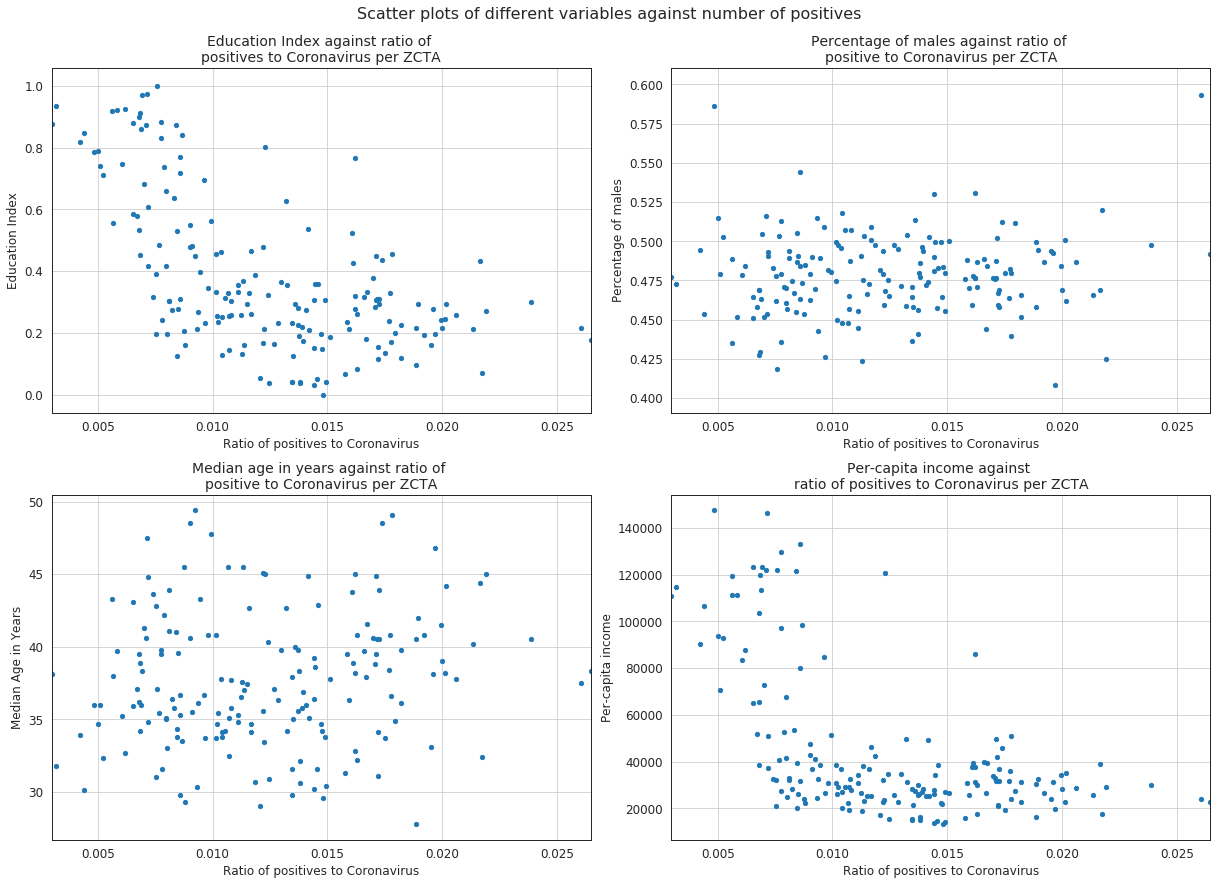

In [49]:
sns.set_context("paper")
fig = plt.figure(figsize=(17,12))
ax1=fig.add_subplot(221)
df_zcta.sort_values("positive")[["zcta","Education Index","positive"]].plot(kind = "scatter", x = "positive", y = "Education Index", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Education Index against ratio of \npositives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Education Index", fontsize=12)
ax1.tick_params(labelsize=12)

ax2=fig.add_subplot(222)
df_zcta.sort_values("positive")[["zcta","male","positive"]].plot(kind = "scatter", x = "positive", y = "male", ax=ax2)
ax2.set_xlim([min_cases,max_cases])
ax2.grid()
ax2.set_title("Percentage of males against ratio of \npositive to Coronavirus per ZCTA", fontsize=14)
ax2.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax2.set_ylabel("Percentage of males", fontsize=12)
ax2.tick_params(labelsize=12)


ax3=fig.add_subplot(223)
df_zcta.sort_values("positive")[["zcta","median age in years","positive"]].plot(kind = "scatter", x = "positive", y = "median age in years", ax=ax3)
ax3.set_xlim([min_cases,max_cases])
ax3.grid()
ax3.set_title("Median age in years against ratio of \npositive to Coronavirus per ZCTA", fontsize=14)
ax3.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax3.set_ylabel("Median Age in Years", fontsize=12)
ax3.tick_params(labelsize=12)

ax4=fig.add_subplot(224)
df_zcta.sort_values("positive")[["zcta","per-capita income","positive"]].plot(kind = "scatter", x = "positive", y = "per-capita income", ax=ax4)
ax4.set_xlim([min_cases,max_cases])
ax4.grid()
ax4.set_title("Per-capita income against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax4.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax4.set_ylabel("Per-capita income", fontsize=12)
ax4.tick_params(labelsize=12)

fig.tight_layout()
fig.suptitle("Scatter plots of different variables against number of positives", y=1.02, fontsize=16)


From these initial plots we can see that some variables will be mostly uncorrelated to the number of cases, such as the median age and the proportion of males. 

The per-capita income and the Education Index appear weakly correlated to the number of Coronavirus cases. In particular, it seems that with really high income, then the cases are low, while areas with per-capita income below $60000$, the cases are evenly spread. When the user interacts with these plots, she will also be able to select the specific areas. Unfortunately, we cannot show this here, as we built that visualization in d3. For reference, the highest per-capita income area is in the heart of Manhattan and has a really small percentage of positive cases.

#### Ethnicities
We now look at the ethnicities.

Text(0.5, 1.02, 'Scatter plots of different variables against number of positives')

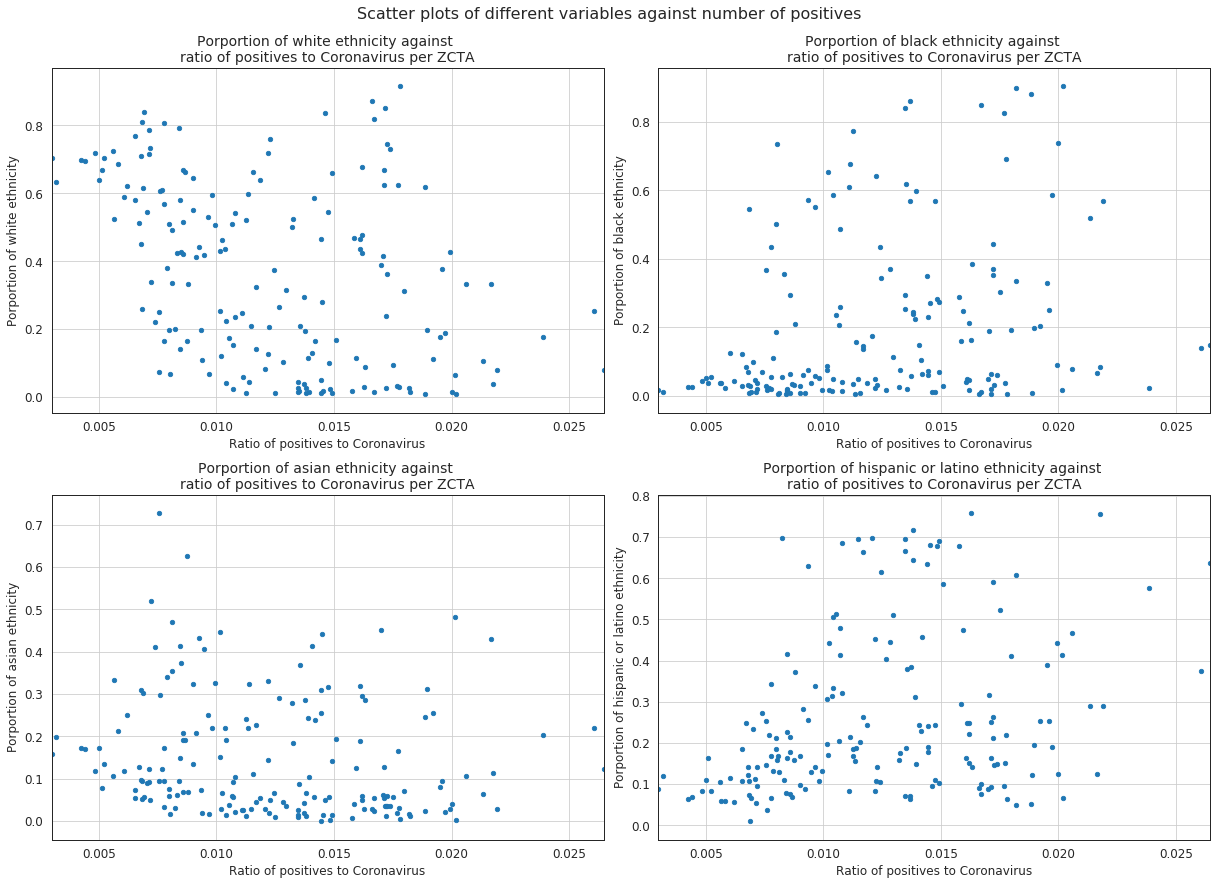

In [62]:
fig = plt.figure(figsize=(17,12))

ax1=fig.add_subplot(221)
df_zcta.sort_values("positive")[["zcta","white alone","positive"]].plot(kind = "scatter", x = "positive", y = "white alone", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Porportion of white ethnicity against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Porportion of white ethnicity", fontsize=12)
ax1.tick_params(labelsize=12)

ax1=fig.add_subplot(222)
df_zcta.sort_values("positive")[["zcta","black or african american alone","positive"]].plot(kind = "scatter", x = "positive", y = "black or african american alone", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Porportion of black ethnicity against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Porportion of black ethnicity", fontsize=12)
ax1.tick_params(labelsize=12)

ax1=fig.add_subplot(223)
df_zcta.sort_values("positive")[["zcta","asian alone","positive"]].plot(kind = "scatter", x = "positive", y = "asian alone", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Porportion of asian ethnicity against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Porportion of asian ethnicity", fontsize=12)
ax1.tick_params(labelsize=12)

ax1=fig.add_subplot(224)
df_zcta.sort_values("positive")[["zcta","hispanic or latino of any race","positive"]].plot(kind = "scatter", x = "positive", y = "hispanic or latino of any race", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Porportion of hispanic or latino ethnicity against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Porportion of hispanic or latino ethnicity", fontsize=12)
ax1.tick_params(labelsize=12)


fig.tight_layout()
fig.suptitle("Scatter plots of different variables against number of positives", y=1.02, fontsize=16)

With these plots again, the correlation is subtle. The number of positive cases is slightly positively correlated to the ethnicity of the population living in an area. In particular here is no note the absence of strong correlation. This corroborates our idea that the ethnicity is not the whole story. This will also be part of the reason why we won't include the ethnicities in the machine learning model: they are highly correlated with all the other variables and don't have a very clear and strong correlation to the number of positive cases. The only scatter plot where a small correlationg can be seen with low number of cases is the hispanic community.

#### Public transport, household size
We now look into related variables, the use of public transportation and the household size.

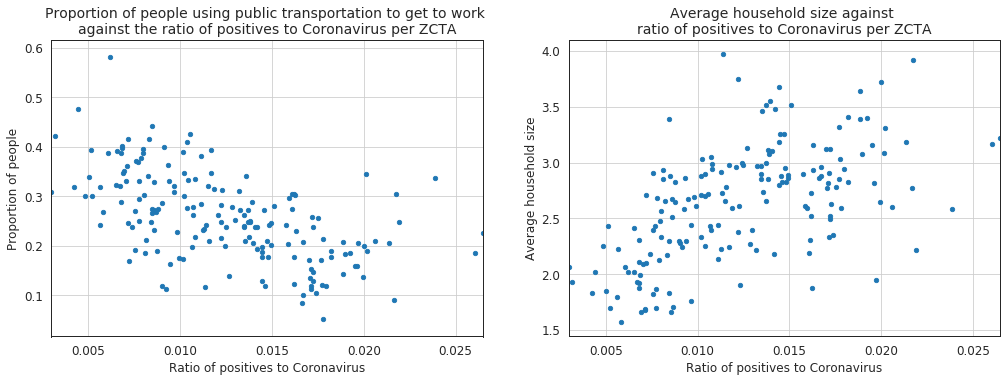

In [64]:
fig = plt.figure(figsize=(17,12))

ax1=fig.add_subplot(221)
df_zcta.sort_values("positive")[["zcta","public transportation (excluding taxicab)","positive"]].plot(kind = "scatter", x = "positive", y = "public transportation (excluding taxicab)", ax=ax1)
ax1.set_xlim([min_cases,max_cases])
ax1.grid()
ax1.set_title("Proportion of people using public transportation to get to work \nagainst the ratio of positives to Coronavirus per ZCTA", fontsize=14)
ax1.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax1.set_ylabel("Proportion of people", fontsize=12)
ax1.tick_params(labelsize=12)

ax2=fig.add_subplot(222)
df_zcta.sort_values("positive")[["zcta","average household size","positive"]].plot(kind = "scatter", x = "positive", y = "average household size", ax=ax2)
ax2.set_xlim([min_cases,max_cases])
ax2.grid()
ax2.set_title("Average household size against \nratio of positives to Coronavirus per ZCTA", fontsize=14)
ax2.set_xlabel("Ratio of positives to Coronavirus", fontsize=12)
ax2.set_ylabel("Average household size", fontsize=12)
ax2.tick_params(labelsize=12)


These plots show a stronger linear correlation to the number of positive coronavirus cases than the ones seen previously. These factors look at specific aspects of the population. The use of public transport seems to be negatively correlated, the less people use public transport, the more coronavirus cases in that area. This is against our first intuition. We expected that more people using public transportation would result in an increase in the number of cases, however this is not true. This could hide an even more hidden factor, which is that the use of public transportation is focused in the heart of the city, where many facilities are readily available and where the first-reposonse was initially focused, therefore, people probably stopped using the public transporation very quickly and managed to control the spread of the virus. Instead, in areas where less public transport is used, is where people were less prone to follow the instructions and increase the number of infected people.

The average size of the household is instead positively correlated with the number of coronavirus cases. This is as expected. Areas where the average household size is bigger are where the education is usually lower and the people work lower-income jobs. So the average household size is a good summary indicator of these other factors that then lead to a wider spread of the virus.

### 2. Correlation between variables
To analyze the relationship between each demographic variable of the zipcodes and in particular their correlation with number of positive coronavirus cases a correlation heatmap has been created here below. We leave pick one of two genders and leave out the *total tests* as they are inevitable correlated with number of positive cases. 

In [ ]:
df_corr=df_zcta
df_corr=df_corr.drop(['Unnamed: 0','zcta','male', 'total tests'], axis=1)
corr=df_corr.corr()
#corr.head()

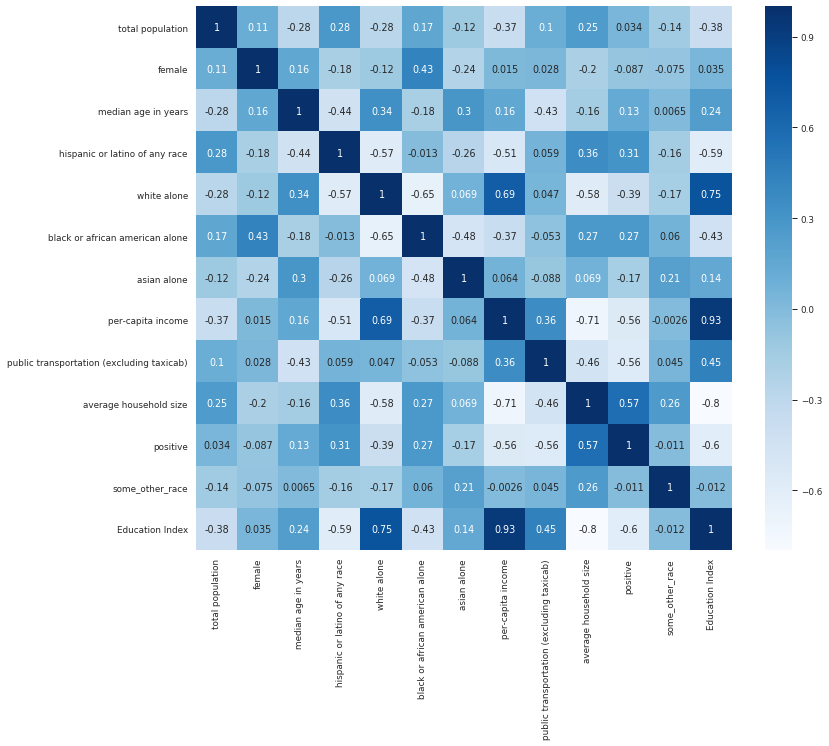

In [69]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, ax=ax, cmap="Blues", annot=True)


We can see that if a high percentage of the population uses public transportation to commute to work we would expect a lower rate of infection. This goes against the assumption that people who are crammed together in buses and metros would be at a high risk of getting infected. However most of public transportation has been at minimum service in New York City and workplaces have been shutdown. Perhaps the awareness of the danger keeps people safe in those communities.

**Variables with positive correlation with number positive coronvairus cases**
- *average household size* (0.57)
- *hispanic or latino* (0.31)

**Variables with negative correlation with number positive coronvairus cases**
- *Education Index* (-0.6)
- *White alone* (-0.39)

It is important to bear in mind that we are looking at variables related to zipcodes and not individuals of the population. Looking at the correlation heatmap and our preliminary analysis alone does not tell us everything about the spread of the disease in NYC. Correlation does not imply causation.

The correlation of porportional size of the ethnic groups vs. the total population however seems to infer that *African Americans* and *Hispanics* are more likely to live in societies that have a high number of the total population infected with the coronavirus. 

This is something to keep in mind when looking at data from NYC with regards to the proportion of people infected for every 100.000 individuals of each ethnic group [nyc-gov](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-deaths-race-ethnicity-05072020-1.pdf).

To analyze the susceptibleness of each ethnic group for the coronavirus we would need data on proportion of each ethnic group infected for the total number of infected individuals in a population.

## Statistical Learning Model

Follows the steps taken in this subsection.

1. Looking into correlation between chosen variables
2. Choosing the model
    * Running the Elastic Net using CV
    * Running the OLS
3. Analysis of residuals
4. Adjusting the model
5. Reducing the model, inference and discussion

* Slider visualization to show prediction and relationship between response and explanatory variables

### 1. Looking into correlation between chosen variables
To try model some of the relationship between the different variables we are trying to do inferencing using an Elastic Net. The Elastic Net is used, as it can take into account the high correlation between the variables by introducing penalty parameters. An ANN was also considered, it will capture non-linearities well, but we are too limited on data to properly train an ANN. First let us prepare the data. A design matrix $X$ will be set up and the target vector $y$. After this we will make a train test split with a test set containing $15\%$ of the data.

In [ ]:
#prepare data for model
df_model=df_zcta[['female','median age in years','per-capita income','Education Index','average household size',"positive"]].astype(float)
df_model.columns = ['female','median age in years','per-capita income','education Index','avg household size',"positive"]

X = np.array(df_model[df_model.columns[0:-1]]) # design matrix
y = np.array(df_model.positive) #target vector

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15)

The different variables that have been chosen are based on previous correlation plots that might affect the number of positives based on the available data. Ethnicities are omitted, as we try to find latent factors that might play in with why we see a difference in ethnicities. 
One of the reasons public transportation has not been included, is that during the COVID-19 epidemic most of the city has been in a lockdown, meaning most people who used to take the public transportation is now at home, unable to take the public transportation. Therefore we do not see public transportation as a good variable to model the positive cases.

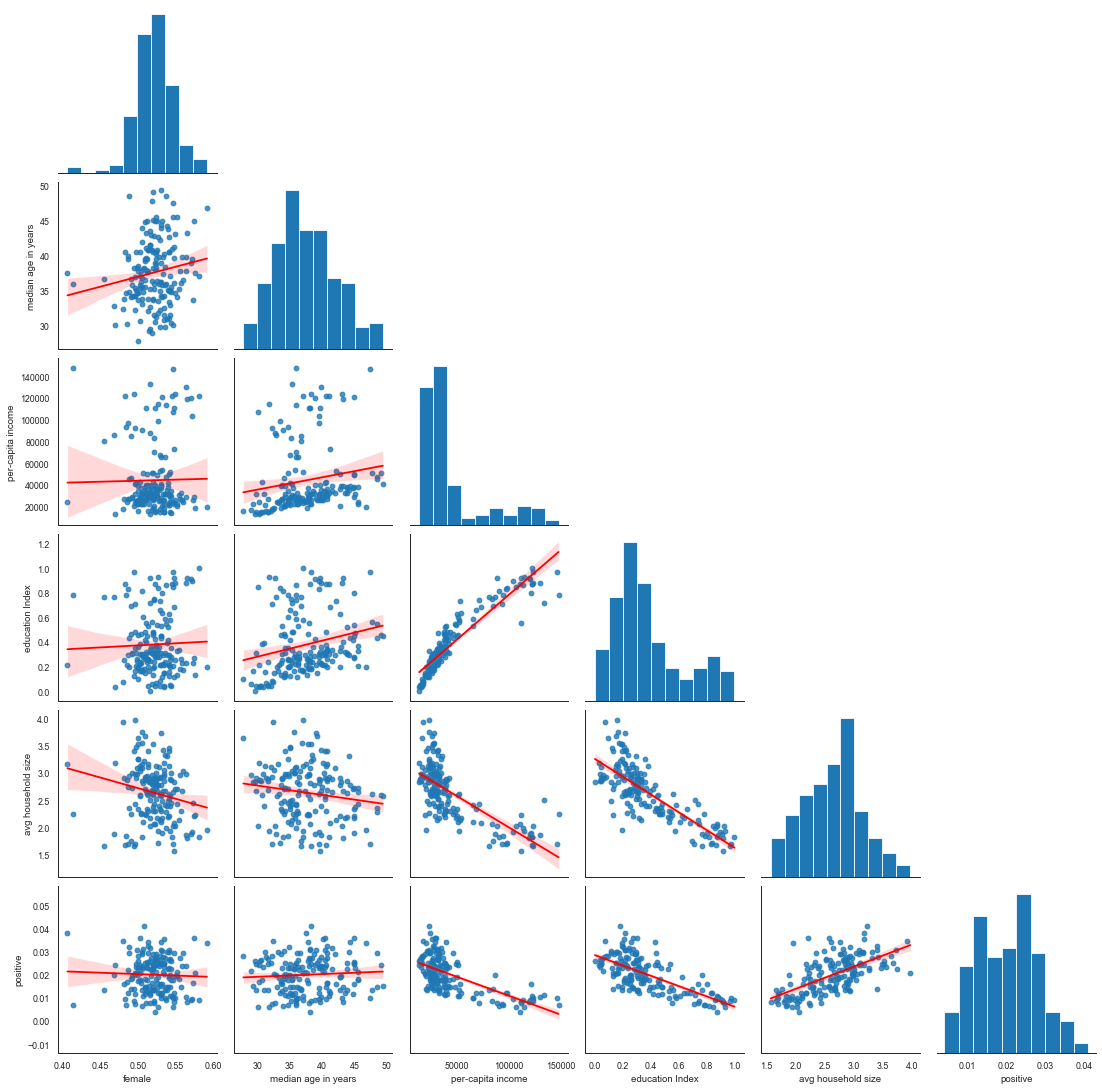

In [13]:
sns.pairplot(df_model, kind="reg", corner=True,plot_kws=dict(line_kws={'color':'red'}))

Above we see that there is a strong correlation between per capita income and education index. Also average household size seems to have some correlation with income. Other factors also seem to be slightly correlated. The main correlation with number of positives seem to be per-capita income, education index and average household size.

### 2. Choosing the model
#### Running the Elastic Net using Cross Validation

We opt for testing first an Elastic Net. The Elastic Net is a sparse regression technique that utilizes the Elastic Net regularization parameter to get both the shrinkage and sparsity of the LASSO and Ridge regression. The loss function that is optimized here using Cyclic Coordinate Descent is the following:

$$
\arg\,\min_{\beta} \cfrac{1}{2N}\Vert y - X\beta \Vert_2^2 + \lambda \left( \alpha \Vert \beta \Vert_1 + \cfrac{1}{2}(1-\alpha) \Vert \beta \Vert_2^2 \right)
$$

Where $N$ is the number of observations, $X$ is the matrix of observations, $y$ is the target value, $\lambda$ is what is called `alpha` in sklearn and $\alpha$ is what is called `l1_ratio` in sklearn, the first controls how much of the regularization we should have, while the second controls how much of the $l_1$ LASSO regularization should be used (so how much sparsity) compared to the $l_2$ Ridge loss (so how much shrinkage).<br>

Here we do a 5 fold cross validation. 5 folds were chosen based on the limited data we have to find optimal parameters. As we still have more observations than variables we do not opt for leave-one-out cross validation, as a smaller number of folds provides lower variance in the mean of the validation error. The parameters are used the amount of sparcity and shrinkage parameters is needed. We standardize the variables to bring them around same scale.

In [18]:
K=5
CV = KFold(K, shuffle=True, random_state = 10)
nparams=50
lambdas = np.linspace(0.01,1,nparams)
ratio = np.linspace(0.01,1,nparams)
Err_tr = np.zeros((len(lambdas),len(ratio), K))
Err_tst = np.zeros((len(lambdas),len(ratio), K))
iter1=0


for inner_train_index, inner_test_index in CV.split(X_train,y_train): #Estimate parameter

    #Extract inner training and test set
    X_tr = X_train[inner_train_index,:]
    y_tr = y_train[inner_train_index]
    X_tst = X_train[inner_test_index,:]
    y_tst = y_train[inner_test_index]
    
    #normalize
    my = np.mean(y_tr)
    y_tr = y_tr-my
    y_tst = y_tst-my
    mx = np.mean(X_tr, axis=0)
    sdx = np.std(X_tr, axis=0)
    X_tr = (X_tr-mx)/sdx
    X_tst = (X_tst-mx)/sdx
    
    #find optimal parameters
    for i in range(0,nparams):
        for j in range(0,nparams):
            reg_elastic = ElasticNet(alpha = lambdas[i], l1_ratio = ratio[j], fit_intercept = False)
            reg_elastic.fit(X_tr, y_tr)
            beta = reg_elastic.coef_
            YhatTrain = np.matmul(X_tr, beta)
            YhatTest = np.matmul(X_tst, beta)
            Err_tst[i, j, iter1] = np.matmul((YhatTest-y_tst).T,(YhatTest-y_tst))/len(y_tst) # test error
    iter1 = iter1+1
idxmin=np.where(np.mean(Err_tst, axis=2)==np.min(np.mean(Err_tst, axis=2)))
lopt = lambdas[idxmin[0]]
ropt = ratio[idxmin[1]]
print('\nOptimal Parameters l: {0} r:{1}..\n'.format(lopt,ropt))


Optimal Parameters l: [0.01] r:[0.03020408]..



It is seen that the $\alpha$ parameter converges to 0. This might indicate that we don't need any regularization. Based on this, we choose to use a basic linear regression (OLS). 

#### Running the OLS

Below we look at the error by refitting the linear regression model and cross validate, to get an unbiased estimate of the root mean squared error.

In [22]:
K1 = 5
k2 = 0
CV1 = KFold(K1,shuffle=True,random_state = 10)
#outer_scores = []
ELN_Err2 = np.zeros(K1)
ELN_Err3 = np.zeros(K1)

for outer_train_index, outer_test_index in CV1.split(X,y): #Estimate model
    #get data of outer train
    Out_Xtr, Out_Xtst =X[outer_train_index], X[outer_test_index]
    Out_ytr, Out_ytst = y[outer_train_index], y[outer_test_index]
    
    #normalize
    my = np.mean(Out_ytr)
    Out_ytr = Out_ytr-my
    Out_ytst = Out_ytst-my
    mx = np.mean(Out_Xtr, axis=0)
    sdx = np.std(Out_Xtr, axis=0)
    Out_Xtr = (Out_Xtr-mx)/sdx
    Out_Xtst = (Out_Xtst-mx)/sdx   
    
    #fit
    reg_init = LinearRegression(fit_intercept=False)
    reg_init.fit(Out_Xtr, Out_ytr)
    YhatTest2 = np.matmul(Out_Xtst, reg_init.coef_)

    k2 += 1
    RMSE = np.sqrt(mean_squared_error(Out_ytst,YhatTest2))
    ELN_Err2[k2-1] = RMSE
    
print("\nMean RMSE Error, outlier model: {}, the mean of the target: {}".format(np.mean(ELN_Err2),np.mean(y)))


Mean RMSE Error, outlier model: 0.005324653501238933, the mean of the target: 0.020069789410733337


We see the error is not too high, considering the scale of the mean for the response variable is around 0.02.
### 3. Analysis of residuals

Here we analyze the residuals to better understand the performance of the model.

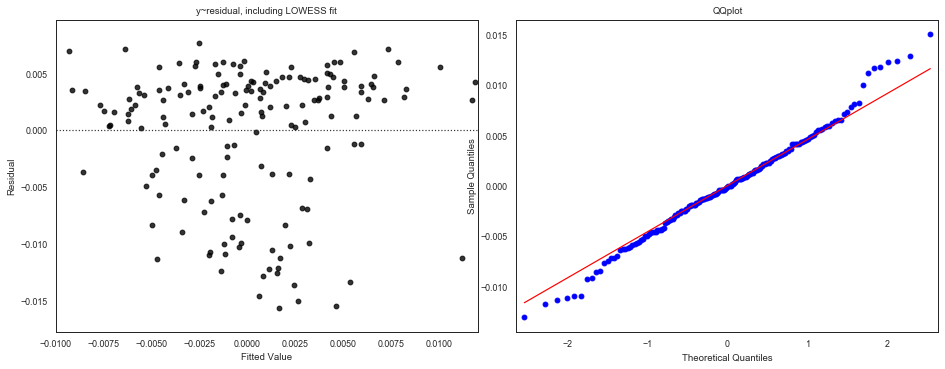

In [24]:
my = np.mean(y)
y_norm = y-my
mx = np.mean(X, axis=0)
sdx = np.std(X, axis=0)
X_norm = (X-mx)/sdx

#model
reg_init = LinearRegression(fit_intercept=False)
reg_init.fit(X_norm, y_norm)
fity=reg_init.predict(X_norm)
residual=y_norm-fity

#residual plot
plt.figure(figsize=(14,6))
sns.residplot(residual, y_norm, lowess=False,scatter_kws={"color": "black"}, line_kws={"color": "red"} ,ax = plt.subplot(1, 2, 1))
plt.xlabel("Fitted Value")
plt.xlim([-0.01,0.012])
plt.ylabel("Residual")
plt.title("y~residual, including LOWESS fit")

#acf pacf
plt.tight_layout(pad=4.0)
sm.qqplot(residual,line='q',ax = plt.subplot(1, 2, 2)) 
plt.title("QQplot")
plt.show()

We have the assumptions of the residuals being independent and identically distributed. We see that there is some slight heteroscedasticity in the residuals above. It could look like a polynomial is missing, seems like we should include higher order terms. The normality assumption seems to be good.
### 4. Adjusting the model
We add the higher order terms to better capture the behaviour of the data.

In [ ]:
# including 2nd order terms
transform1=PolynomialFeatures(degree=2,include_bias=False)
X_high=transform1.fit_transform(X)

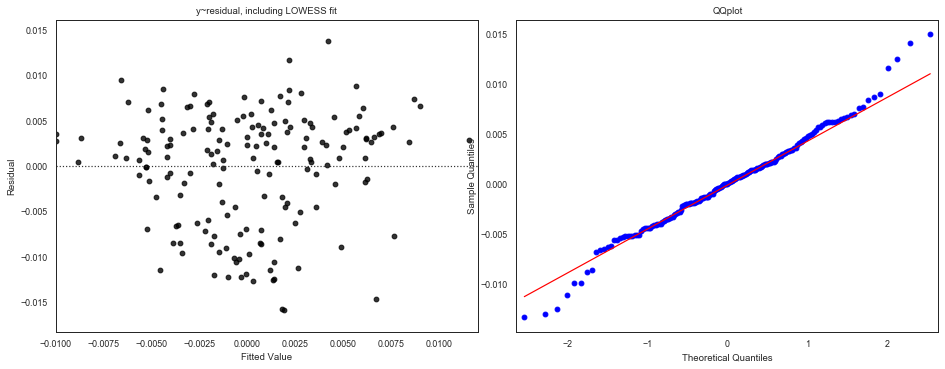

In [26]:
my = np.mean(y)
y_norm = y-my
mx = np.mean(X_high, axis=0)
sdx = np.std(X_high, axis=0)
X_norm = (X_high-mx)/sdx

reg_best = LinearRegression(fit_intercept=False)
reg_best.fit(X_norm, y_norm)
fity=reg_best.predict(X_norm)
residual=y_norm-fity

plt.figure(figsize=(14,6))
sns.residplot(residual, y_norm, lowess=False,scatter_kws={"color": "black"}, line_kws={"color": "red"} ,ax = plt.subplot(1, 2, 1))
plt.xlabel("Fitted Value")
plt.xlim([-0.01,0.012])
plt.ylabel("Residual")
plt.title("y~residual, including LOWESS fit")

plt.tight_layout(pad=4.0)
sm.qqplot(residual,line='q',ax = plt.subplot(1, 2, 2)) 
plt.title("QQplot")
plt.show()

We see the residuals look more heteroscedastic now, so this is good. Let's look at the autocorrelation

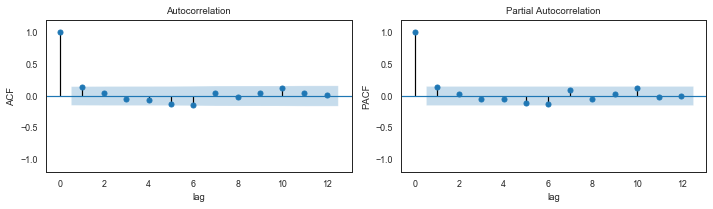

In [29]:
# pacf and acf
nlags = 12
plt.figure(figsize=(10,3))
plot_acf(residual,ax=plt.subplot(1,2,1), lags=nlags)
plt.xlabel("lag")
plt.ylim([-1.2, 1.2])
plt.ylabel("ACF")
plot_pacf(residual,ax=plt.subplot(1,2,2), lags=nlags)
plt.xlabel("lag")
plt.ylim([-1.2, 1.2])
plt.ylabel("PACF")
plt.tight_layout()
plt.savefig('acf.png')

The autocorrelation looks fine, meaning there is not a lot of correlation between the residuals, they seem independent. A slight borderline significant lag in lag 1, but besides that it looks fine.
### 5. Reducing the model, inference and discussion
We use the statsmodels API to manually reduce the model. Removing the variable with the highest p-value and highest order. First standardize to create the model:

In [ ]:
#standardize
df_model.columns= ['female','median_age','income','education','household_size',"positive"]
mean_X = df_model[['female','median_age','income','education','household_size']].mean()
std_X = df_model[['female','median_age','income','education','household_size']].std()
mean_Y = df_model["positive"].mean()
df_model_standardized = (df_model[['female','median_age','income','education','household_size']] - mean_X).div(std_X)
df_model_standardized=df_model_standardized.assign(positive=df_model["positive"]-mean_Y)

Follows the reduction of the model.

In [32]:
fit1=SM.ols(formula="positive ~  -1+female + median_age + income+education+household_size+I(female**2)+I(median_age**2)+I(income**2)+I(education**2)+I(household_size**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1+female + median_age + income+education+household_size+I(female**2)+I(median_age**2)+I(income**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1+female + median_age + income+education+I(female**2)+I(median_age**2)+I(income**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1+female + median_age + income+education+I(median_age**2)+I(income**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1+female + median_age + income+education+I(median_age**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1+female + median_age +education+I(median_age**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

fit1=SM.ols(formula="positive ~  -1 + median_age +education+I(median_age**2)+I(education**2)",data=df_model_standardized).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.577
Method:                 Least Squares   F-statistic:                              61.35
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.45e-32
Time:                        15:39:11   Log-Likelihood:                          685.43
No. Observations:                 177   AIC:                                     -1363.
Df Residuals:                     173   BIC:                                     -1350.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_age             0.0026      0.000      5.754      0.000       0.002       0.004
education             -0.0070      0.001    -12.985      0.000      -0.008      -0.006
I(median_age ** 2)    -0.0007      0.000     -2.316      0.022      -0.001      -0.000
I(education ** 2)      0.0009      0.000      2.472      0.014       0.000       0.002
==============================================================================
Omnibus:                        3.465   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.273
Skew:                           0.198   Prob(JB):                        0.195
Kurtosis:                       3.535   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We end up with that median age and education index is significant. based on the coefficients we see the prediction of positive cases decreases the higher education index we have, as the highest education index is 1, the quadratic term will not take over. We also see that the positives increase the higher the median age. <br>

This makes sense as education index is correlated with income, and from previous correlation plots it can be seen that there seem to be a relationship between income and positive cases, as well. Education and income are both highly correlated to each other, a low income often mean low educated. This explains why per-capita income does not show up significant in the model, education already explains all the information that income can explain. To show this we try to refit the final model above, to see if income is also highly significant:

In [46]:
fit1=SM.ols(formula="positive ~  -1 + median_age +income+I(median_age**2)+I(income**2)",data=df_model_standardized).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              47.63
Date:                Fri, 15 May 2020   Prob (F-statistic):                    5.91e-27
Time:                        15:53:59   Log-Likelihood:                          672.99
No. Observations:                 177   AIC:                                     -1338.
Df Residuals:                     173   BIC:                                     -1325.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_age             0.0021      0.000      4.640      0.000       0.001       0.003
income                -0.0080      0.001    -10.581      0.000      -0.010      -0.007
I(median_age ** 2)    -0.0009      0.000     -2.812      0.005      -0.001      -0.000
I(income ** 2)         0.0015      0.000      4.007      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.494   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.404
Skew:                           0.217   Prob(JB):                        0.496
Kurtosis:                       2.963   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As can be seen the income comes out highly significant, as expected.
## Making a slider to see the prediction
We now want to give the reader a feeling of how the prediction of positive cases relate to education, index etc. to do this a slider setup will be used and a basic linear regression of all the variables. Income is removed, as it is already being described by the education variable. First fitting the model:

In [41]:
mx=X[:,[0,1,3,4]].mean(0)
sdx=X[:,[0,1,3,4]].std(0)
my = y.mean()
X_st = (X[:,[0,1,3,4]]-mx)/sdx
y_st = y-my
reg_base = LinearRegression(fit_intercept=False)
reg_base.fit(X_st, y_st)
reg_base.coef_

array([-0.00026473,  0.00200943, -0.00529024,  0.00095682])

Now we make the slider

In [ ]:
source = ColumnDataSource(data=dict(x=reg_base.coef_, y=np.zeros(len(reg_base.coef_)), mx=mx, sdx=sdx))

xmax=X.max(0)
xmin=X.min(0)

# define sliders
female_slider = Slider(start=xmin[0], end=xmax[0], value=xmin[0], step=.01, title="Percentage of females")
age_slider = Slider(start=xmin[1], end=xmax[1], value=xmin[1], step=.1, title="Median age in years")
education_slider = Slider(start=xmin[3], end=xmax[3], value=xmin[3], step=.01, title="Education index")
household_slider = Slider(start=xmin[4], end=xmax[4], value=xmin[4], step=.1, title="Average household size")
pop_slider = Slider(start=1000, end=100000, value=5000, step=.1, title="Population")

# define callback to calculate prediction and update values
callback = CustomJS(args=dict(source=source, female=female_slider, age=age_slider,education=education_slider
                              ,household=household_slider,pop=pop_slider, mu=my),
                    code="""
    let data = source.data;
    let mx = data['mx']
    let sdx = data['sdx']
    let female_val = (female.value+mx[0])/sdx[0];
    let age_val = (age.value+mx[1])/sdx[1];
    let education_val = (education.value+mx[2])/sdx[2];
    let household_val = (household.value+mx[3])/sdx[3];
    let pop_val = pop.value
    let x = data['x']
    let y = data['y']
    
    y[0] =  Math.round((x[0]*female_val + x[1]*age_val+x[2]*education_val+x[3]*household_val+mu)*pop_val);
    source.data["y"] = y
    console.log(source.data["y"])
    source.change.emit();
""")

# do on change
female_slider.js_on_change('value', callback)
age_slider.js_on_change('value', callback)
education_slider.js_on_change('value', callback)
household_slider.js_on_change('value', callback)
pop_slider.js_on_change('value', callback)

#adding button
button =  Button(label='Predict Positives')
div = Div(width=100, height=10, height_policy="fixed")

# do callback to display the output
def display_event(div, attributes=[], style = 'float:left;clear:left;font_size=13px'):
   "Build a suitable CustomJS to display the current event in the div model."
   return CustomJS(args=dict(div=div, attrs = attributes), code="""
       var args = [];
       console.log(attrs)
       for (var i = 0; i<attrs.length; i++) {
           args.push(attrs[i] + '=' + Number(cb_obj[attrs[i]]).toFixed(2));
       }
       var line = "<span><b>Output: " + String(attrs.data["y"][0]) + "</b></span>";
       var text = div.text.concat(line);
       div.text = line
   """)

button.js_on_event(ButtonClick, display_event(div, source))

# set up layout
layout = row(
    column(female_slider,age_slider,education_slider,household_slider,pop_slider),
    column(button, div)
)

show(layout)


![Screenshot of visualization 4](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz4.png "Screenshot of visualization 4")

OBS: the above is a screenshot, consult the website to play with it. Notice how the positive percentage increases when sliding median age and average household size up, and down if you slide the number of females and education index up. The worst case scenario (highest percentage of being positive) is if you are male, elder, low education index (or low income), and your household size is large.

# Genre

### Data Story

The visualizations is presented with of a Annotated maps/graphs following a linear path resembeling the Martini glas structure up the narrative path in the beginning and opening up later for free visual exploration of the demographic variables that identifie the areas of New York City that have suffered the worst of the coronavirus.

As we have started at by introducing the background of the story unfolds.

1. Vizualisation: we have an annotated graph presenting the timeline and events as they unfolded during the coronavirus crisis in NYC from 2020-03-01 to 2020-05-14. This was chosen as we saw it as the best way of representing the background of the story we wanted to present. The user gets *details on demand* when hovering over over marked dates. The number of new positive cases per borogh can be highlighted and compared with each other as well as the total number of new cases.. 


After Visualization 1 we focus the end users attention to demographic factors, the distribution of income, medical spending and median age of each ethnic group in the city as well as showing the poverty rate for ethnic group in each borough.

2. Vizualization: magazine style graph without and interactivitie as it visualizes simple statistical facts about the socioeconomic status for each of the five ethnic groups.

With this we encourage the reader to think critically about other demographic factors than ethnicity when exploring the causes for and victims of the spread of the coronavirus.

After that we go to visualization 3. 

3. Vizualization: a big interactive geo-map and correlation plot that displays *Details on Demand* while maintaining a *Consistant Visual Platform*. Nothing less would suffice as a tool for the end user to visualize how demographic factors come into play in the spread of the coronavirus in NYC.


If that's not enough. After exploring visualization 3 we invite the user to test how his/hers speculations hold up against our machine learning algorithm in predicting the number of positive cases in an area based on variables chosen by the user.

4. Visualization: Model based on simple linear-regression model with sliders for each variable allowing the user to select their value and get the predicted outcome by the click of a button. This visualization was chosen as it concludes the story by telling the user, if nothing else, how difficult it is to predict the spread of a virus based on simple correlated statistics. 

### Tools of Visual Narrative 

- Visual structuring
    * *Consistent Visual Platform* of the interactive maps in visualization 3 and 4.  
        * To make it easier for the user to flip through different maps and correlation graphs to get an overview of the variables presented.
    
- Highlighting
    * *Feature Distinction* in (viz1,viz2,viz3,viz4) 
        * We picked this for all our visualizations as it is important to highlight the demographic features of each area.
    
- Transition Guidance
    * Animated Transitions in (viz3)
        * To highlight the correlation plot of the visualization.

### Tools of Narrative Structure

- Ordering 
    - Linear (We wanted to tell a story from beginning to the end. NYC was hit harde people of ethnic minorities are being hit harde. Maybe not only because of their ethnicitie)
    
- Interactivity
    - Hover Highlighting/Details (viz1,viz3) 
        * We wanted the user to take time to get to know these visualizations and feed them details on demand as they explored the demographics of different NYC zipcode areas.
    - Filtering/Selection/Search (viz3,viz4)
        * Because those visualizatons contain a lot of informtion that would be cumbersome to fit in a table

- Messaging
    - Annotations (viz1) 
        * Gives the reader a better sense of the story by displaying information from other sources.
    - Introductory Text (viz1,viz2,viz3,viz4)
        * As all of the different visualizations contain a lot of information we found it necessary to introduce each of them to the user.
    

# Visualizations

We have chosen 4 visualizations that should follow a slideshow format. The idea is that we want the user to play around with each of the visualizations to explore the complex data. The visualizations will follow a linear path and enable both an author driven-approach and a reader-driven approach. In this section we will explain and discuss each of the visualizations.

### Visualization 1

We start with visualization 1. This is the starting step of the readers experience. In visualization 1 there will be an overview of the situation and the big picture will be introduced. The figure will show each of the positive rates per million people of the five boroughs in New York City, it will also show the total number of new positives and the number of new tests performed for every million people. The user can hover the mouse over the plot lines to see the number of positives on that particular date for each borough. In the top right one can enable if they want to see the information of the lines defining the positive numbers and tests performed when hovering the mouse over it, the ordering of it is consistent with the ordering of the legend labels. In the legend one can mute what the reader does not want to see, by clicking the labels. For the total new positives a rolling average has been made to easily see the trend. A histogram of the number of new positives is also shown in the background to make the reader able to compare number of positives for each of the boroughs. Finally, to engage the reader a number of vertical lines can be seen in the plot. Those lines can be hovered above and will then inform the reader about major events occurring at that specific date. It all is shown in the screenshot of visualization 1 below.

![Screenshot of visualization 1](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz1.png "Screenshot of visualization 1")

### Visualization 2

After the introduction of visualization 1 we will introduce visualization 2. This will introduce some descriptive figures to the reader. There is no interaction in those plots, just statistics of potential important factors between the different ethnicities. In the first screenshot in the top left we see the income of each ethnicity, outliers are hidden, as it will make it tough to see general population differences. To the top right, the age is shown of the different ethnicities. Bottom left, the medical spending is shown, which can be seen to follow the same trend as income. Bottom right is how many percent of the ethnicity groups in each borough can be classifed as poor. Finally in the bottom, a stacked bar chart shows the distribution of the different ethnicities in each borough.

![Screenshot of visualization 2](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz2.png "Screenshot of visualization 2")
![Screenshot of visualization 21](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz2_1.png "Screenshot of visualization 21")

### Visualization 3

Visualization 3 is a comprehensive visualization. We move from an overview of the boroughs to a more detailed view of each of the zip codes within each borough of NYC. When hovering the mouse of the map one can see the total population of each zip code. The color gradient to the top left also shows the population gradient as can be seen in the map. One can zoom and drag the map around. The reader can also change the variable to show, below one can see the plot for the per-capita income in dollars.

![Screenshot of visualization 3](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz3_1.png "Screenshot of visualization 3")
![Screenshot of visualization 33](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz3_3.png "Screenshot of visualization 33")

When changing the variable a plot in the bottom will also show. It is a bubble plot showing the correlation between the chosen variable and the number of positives for every thousand in each zip code. Below it is seen that we have chosen `Total population`. One can hover the mouse over each bubble to see the information about the zip code and the chosen variable and the zip code. The highlighted bubbles are the zip codes the reader clicked on in the above visualization of the NYC map.

![Screenshot of visualization 32](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz3_2.png "Screenshot of visualization 32")

The goal with the visualization is to make the user interact with the visualization and investigate the different correlations between the number of positives with COVID-19 and different variables. It is right because it dives deeper into the narrative of the story for the reader, here we start investigate dependence between the variables and possible factors that might explain a reason to the difference in the number of positives.<br>

To further see how we made the visualization and the data used the visualization is found here:

https://observablehq.com/@apra/visualization-3-the-big-map-and-correlation-plot

### Visualization 4

Visualization 4 will round off the story. It is a model based on a simple linear regression. It tries to do inference on the variables and then let the reader play around with the significant variables to see how they affect the prediction of number of positives. One can use the sliders to set different numbers of the explanatory variables and then press the button to make a prediction, which will be the number of COVID-19 positives. The sliders will only be in range of the domain of the model, meaning it will not use values outside of the training datas domain.

![Screenshot of visualization 4](https://raw.githubusercontent.com/apra/newyork_covid19_demographics/master/viz%20screenshots/viz4.png "Screenshot of visualization 4")

### Why are they relevant?

* **Visualization 1**: We wanted to give the reader a gentle introduction to the COVID-19 situation, before diving more into the factors that might play a part in the trend of the number of new positives. We found visualization 1 to do just that. The visualization uses the COVID-19 new york city data set for boroughs and the poverty data set from the census bureau.

* **Visualization 2**: Visualization 2 will make the reader think about the data and the relative percentages of the different variables. It is a good introduction of the explanatory data and allows one to see the differences between and status of the ethnicities and boroughs. 

* **Visualization 3**: With this visualization we aim to show the user how factors correlate with coronavirus cases, without losing the geographical sense of the whole analysis. We choose to provide the information selected using a map because we need the user to remember that this analysis is based on the assumption that demographical summary statistics at the ZCTA-level are enough to draw meaningful correlations to the number of cases positive to COVID-19. This is crucial in understand the limits of the analysis and also its full extent.

* **Visualization 4**: The idea with this visualization is to make the reader get a feeling of how the number of positives interact with the variables. It rounds off the story in a nice way, as based on statistical inference the dependence can be seen of the variables.

# Discussion

### The good
 
We managed to create a narrative and the visualizations we sketched in part A of the assignment. Significant explanatory variables were found that might explain the difference in number of positives in the different regions of New York City. We observed a correlation between socio-economic status, hereby mainly income and education level and how they relate to ethnicity. We also achieved the main goal of the analysis. Giving the user more awareness of the real factors that are underlying the spread of Coronavirus in New York City. We showed that, clearly, the ethnicities are not the whole picture, there is much more going on, between ethnicities more than within ethnicities. The full understanding cannot come from just this analysis. The point is trying to make anyone reading this aware that the factors that played into the spread of Coronavirus were much more complicated and inter-related than a brief statistical overview of which ethnicities were most hit. Careful consideration of the data showed this.
 
 
### What to improve
 
To mention the things that could be improved will be listed in a point format below<br>
* More data<br>
    * To use a more powerful model, such as a neural network, more data is needed, we only had 177 rows, which is way too little data for a more powerful method.
* Better data<br>
    * To really explore the data and do inference data on individual people is needed, such as for the NYC poverty data we used, the reason we could not use it for analyzing its relationship with the COVID-19, is because we did not have individual COVID-19 data for each person. Another thing would to have medical insurance data for the zip code data.
* The map<br>
    * A three dimensional map would allow us to show the cases directly on the map, this was out of the scope for this course.
* Better analysis<br>
    * We wanted to do a more in depth analysis, to really dig into what might explain the differences in the COVID-19 cases. However, as mentioned earlier, to do this we needed better and more data.

# Contributions

Below the individual contributions can be seen.

Samuele:<br>
* Main responsible
    * Website
    * Visualization 3 and description
    * Correlation to the number of positive
    * Fontsizes and colors, design
    * Motivation - Dataset description
    * Motivation - Goal of the visualization
    * Education index description
    * Explorative Data Analysis
    * Added vertical lines to the visualization 1
    * Made code prettier

Christian:<br>
* Main responsible:
    * Imported data sets and cleaning the data, making it ready for use.
    * Introducing the data sets
    * Visualization 2
    * Visualization 1 
    * The model + Visualization 4 in data analysis section
    * Visualization section
    * Website introduction and visualization 1 and 4 description
    
Stein:<br>
* Main responsible
    * Education index
    * Genre section
    * Motivation - Dataset motivation
    * Visualization 2 description on website
    * Correlation between variables
    * Gathered timeline story for visualization 1